In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sites = ["jawiki", "cswiki", "cawiki", "svwiki", "arwiki", "dewiki", 
             "elwiki", "enwiki", "eswiki", "fawiki", "fiwiki", "frwiki", 
             "hewiki", "idwiki", "itwiki", "kowiki", "nlwiki", "plwiki", 
             "ptwiki", "rowiki", "ruwiki", "sqwiki", "srwiki", "trwiki", 
             "ukwiki", "viwiki", "warwiki", "zhwiki"]

In [4]:
links_count = pd.read_pickle("temp_data/links_count.pkl")
links_count_enriched = pd.read_pickle("temp_data/links_count_enriched.pkl")

In [6]:
links_count.head(1)

,site,links_count,total
0,jawiki,861,6


In [8]:
(links_count.total*links_count.links_count).sum()

888945681

In [9]:
(links_count_enriched.total*links_count_enriched.links_count).sum()

2900001688

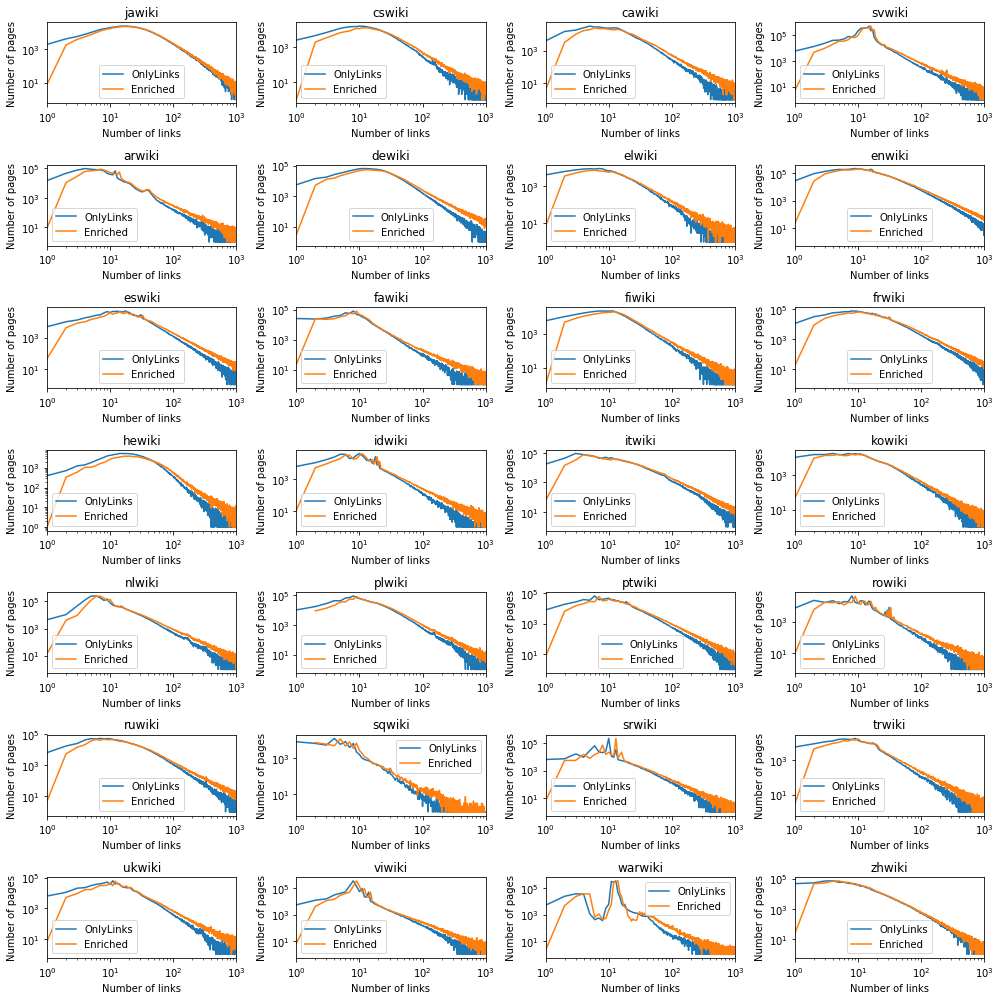

In [22]:
COLUMNS = 4
row_count = math.ceil(len(sites)/COLUMNS)

fig, axs = plt.subplots(row_count, COLUMNS, figsize=(14,14))

for idx in range(0, len(sites)):
    site = sites[idx]
    ax = axs[idx//COLUMNS][idx%COLUMNS]
    p=links_count[links_count.site==site].sort_values("links_count")\
        .plot(x="links_count", y="total", logx=True, logy=True, title=site, ax=ax, label="OnlyLinks")
    p=links_count_enriched[links_count_enriched.site==site].sort_values("links_count")\
        .plot(x="links_count", y="total", logx=True, logy=True, title=site, ax=ax, label="Enriched")
    p.set_ylabel("Number of pages")
    p.set_xlabel("Number of links")
    ax.set_xlim((0,1000))
    
fig.suptitle('')
fig.tight_layout()

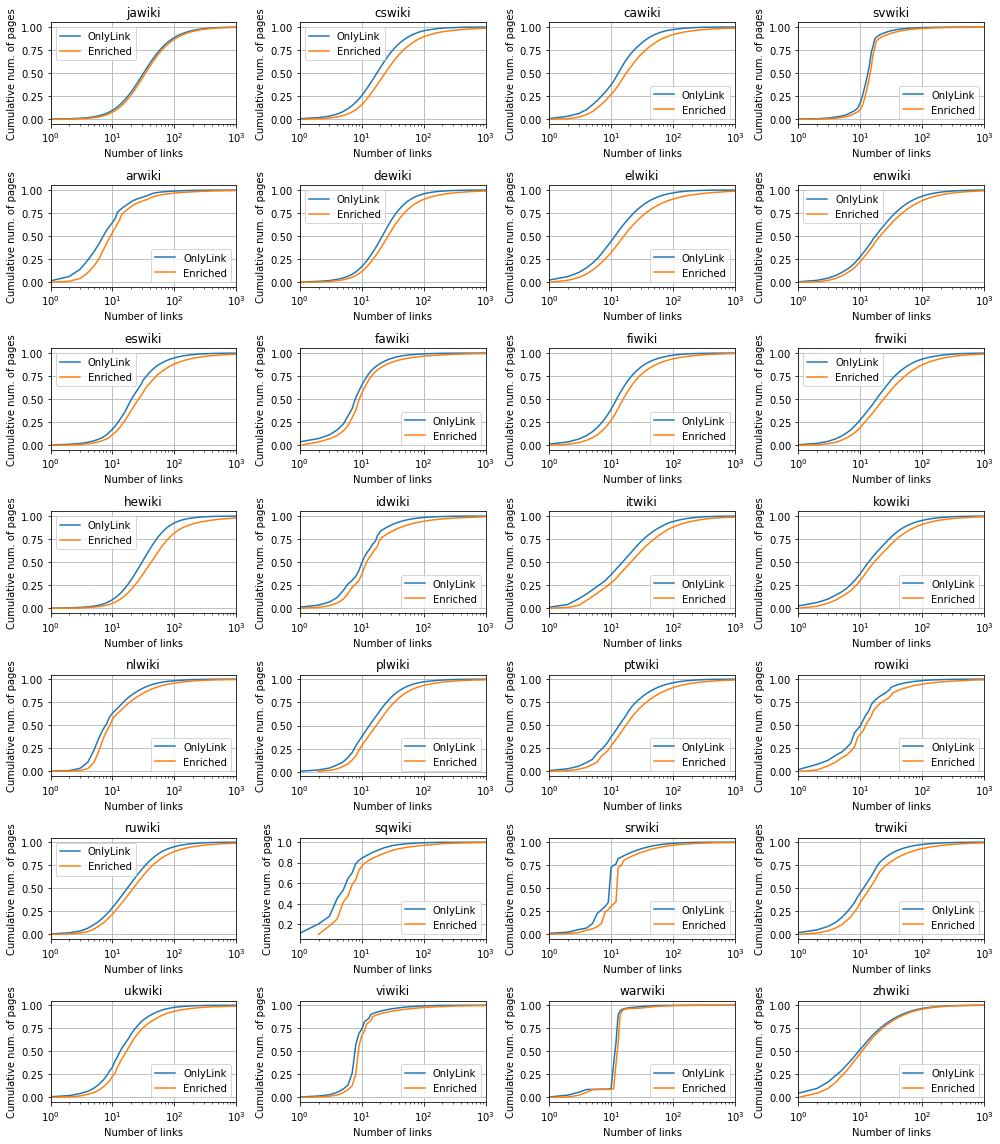

In [23]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

COLUMNS = 4
row_count = math.ceil(len(sites)/COLUMNS)

fig, axs = plt.subplots(row_count, COLUMNS, figsize=(14,16))

for idx in range(0, len(sites)):
    site = sites[idx]
    ax = axs[idx//COLUMNS][idx%COLUMNS]
    total = links_count[links_count.site==site].sort_values("links_count")
    total['cumulative'] = total['total'].cumsum()/total['total'].sum()
    p=total.plot(x='links_count', y='cumulative', logx=True, title=site, ax=ax, grid=True, label="OnlyLink")
    
    total = links_count_enriched[links_count_enriched.site==site].sort_values("links_count")
    total['cumulative'] = total['total'].cumsum()/total['total'].sum()
    p=total.plot(x='links_count', y='cumulative', logx=True, title=site, ax=ax, grid=True, label="Enriched")
    p.set_ylabel("Cumulative num. of pages")
    p.set_xlabel("Number of links")
    ax.set_xlim((0,1000))
    
fig.suptitle('')
fig.tight_layout()